# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Save Configuration
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Testing url for Paris to make sure it works
# city_url = query_url + 'Paris'
# print(city_url)

#Creating Empty dictionary to hold data
weather_data = []

print("Beginning Data Retrieval")
print("------------------------------")

#To track the city in the count
city_Index = 1
cityCount = len(cities)

#To reset the count to 1 until 59
counter = 1

for city in cities:
    response = requests.get(query_url + city).json()
    
#print(json.dumps(response, indent=4, sort_keys=True))
    
    try:   
        CityName = response["name"]
        Cloudiness = response["clouds"]["all"]
        Country = response["sys"]["country"]
        Date = response["dt"]
        Humidity = response["main"]["humidity"]
        Lat = response["coord"]["lat"]
        Lng = response["coord"]["lon"]
        Max_Temp = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
        if city_Index % 59 == 0:
            print(f"Processing Record {city_Index} of set {counter} | {CityName}")
            city_Index = city_Index + 1
            time.sleep(3)
            counter = counter + 1
        else:
            print(f"Processing Record {city_Index} of set {counter} | {CityName}")
            city_Index = city_Index + 1
        
        weather_data.append({'City': CityName, 'Cloudiness': Cloudiness, 'Country': Country, 
                             "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, 
                             "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})
    
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | Rikitea
Processing Record 2 of set 1 | Bambous Virieux
Processing Record 3 of set 1 | Pangnirtung
Processing Record 4 of set 1 | Castro
Processing Record 5 of set 1 | Fortuna
Processing Record 6 of set 1 | Bilma
Processing Record 7 of set 1 | New Norfolk
Processing Record 8 of set 1 | Vaini
Processing Record 9 of set 1 | Souillac
Processing Record 10 of set 1 | Kapaa
Processing Record 11 of set 1 | Arraial do Cabo
City not found. Skipping...
Processing Record 12 of set 1 | Albany
Processing Record 13 of set 1 | Sao Joao da Barra
Processing Record 14 of set 1 | Latur
Processing Record 15 of set 1 | Ushuaia
Processing Record 16 of set 1 | Mataura
Processing Record 17 of set 1 | Vila Franca do Campo
Processing Record 18 of set 1 | Raudeberg
Processing Record 19 of set 1 | Jamestown
Processing Record 20 of set 1 | Busselton
Processing Record 21 of set 1 | Nanortalik
Processing Record 22 of set 1 | Newpor

Processing Record 180 of set 4 | Duobao
City not found. Skipping...
Processing Record 181 of set 4 | The Valley
Processing Record 182 of set 4 | Austin
Processing Record 183 of set 4 | Chapais
Processing Record 184 of set 4 | Praia da Vitoria
Processing Record 185 of set 4 | Ngunguru
Processing Record 186 of set 4 | Haines Junction
Processing Record 187 of set 4 | Kautokeino
City not found. Skipping...
Processing Record 188 of set 4 | Tuatapere
Processing Record 189 of set 4 | Roald
City not found. Skipping...
Processing Record 190 of set 4 | Nemuro
Processing Record 191 of set 4 | Sirjan
Processing Record 192 of set 4 | Avera
Processing Record 193 of set 4 | San Patricio
Processing Record 194 of set 4 | Siniscola
Processing Record 195 of set 4 | Baymak
Processing Record 196 of set 4 | Port Blair
City not found. Skipping...
Processing Record 197 of set 4 | Taltal
Processing Record 198 of set 4 | Mokhsogollokh
Processing Record 199 of set 4 | Bikaner
Processing Record 200 of set 4 | Rio

Processing Record 360 of set 7 | Hit
Processing Record 361 of set 7 | Plettenberg Bay
Processing Record 362 of set 7 | Plouzane
Processing Record 363 of set 7 | San Cristobal
Processing Record 364 of set 7 | Grindavik
City not found. Skipping...
Processing Record 365 of set 7 | Balabac
Processing Record 366 of set 7 | Iberia
Processing Record 367 of set 7 | Swan Hill
Processing Record 368 of set 7 | Arman
Processing Record 369 of set 7 | Kjollefjord
Processing Record 370 of set 7 | Dukat
Processing Record 371 of set 7 | Monastyrshchina
Processing Record 372 of set 7 | Bar Harbor
Processing Record 373 of set 7 | Te Anau
Processing Record 374 of set 7 | Orebro
Processing Record 375 of set 7 | Narsaq
Processing Record 376 of set 7 | Chilca
Processing Record 377 of set 7 | Gisborne
Processing Record 378 of set 7 | Suraabad
Processing Record 379 of set 7 | Tonota
Processing Record 380 of set 7 | Kollegal
Processing Record 381 of set 7 | Nizwa
Processing Record 382 of set 7 | Smithers
Proces

In [6]:
#Priting the first element in the weather data list to make sure it has the relevant data
print(weather_data[0])

{'City': 'Rikitea', 'Cloudiness': 88, 'Country': 'PF', 'Date': 1552920940, 'Humidity': 100, 'Lat': -23.12, 'Lng': -134.97, 'Max Temp': 25.59, 'Wind Speed': 9}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Count the number of records in the dictionary
df = pd.DataFrame(data = weather_data)
df.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [8]:
#Display the dataframe
weather_by_city = pd.DataFrame(weather_data)
weather_by_city.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,88,PF,1552920940,100,-23.12,-134.97,25.59,9.0
1,Bambous Virieux,75,MU,1552920844,74,-20.34,57.76,29.00,3.1
2,Pangnirtung,20,CA,1552917600,61,66.15,-65.72,-31.00,1.5
3,Castro,75,CL,1552917600,81,-42.48,-73.76,10.00,1.5
4,Fortuna,75,ES,1552920925,47,38.18,-1.13,16.00,5.7


In [9]:
#Export Dataframe to CSV File
weather_by_city.to_csv("weather_by_city.csv", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\Desthy\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


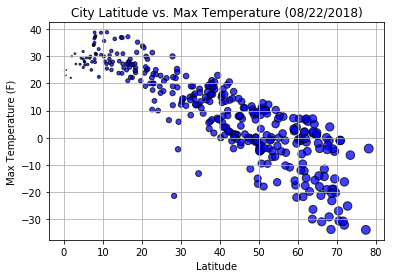

In [10]:
x_axis = weather_by_city["Lat"]
Temperature = weather_by_city["Max Temp"]

plt.scatter(x_axis, Temperature, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title('City Latitude vs. Max Temperature (08/22/2018)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid()

#Save the Figure
plt.savefig("../Images/LatvsTemp.png")

#### Latitude vs. Humidity Plot

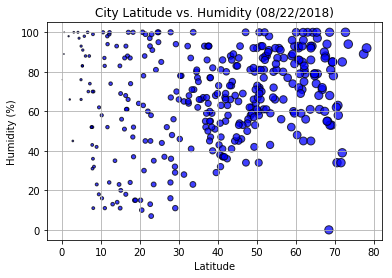

In [11]:
x_axis = weather_by_city["Lat"]
Humidity = weather_by_city["Humidity"]

plt.scatter(x_axis, Humidity, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title('City Latitude vs. Humidity (08/22/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

#Save the Figure
plt.savefig("../Images/Lat vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

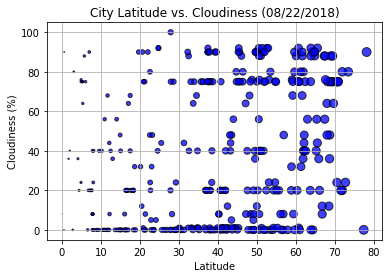

In [12]:
x_axis = weather_by_city["Lat"]
Cloudiness = weather_by_city["Cloudiness"]

plt.scatter(x_axis, Cloudiness, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title('City Latitude vs. Cloudiness (08/22/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()

#Save the Figure
plt.savefig("../Images/Lat vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

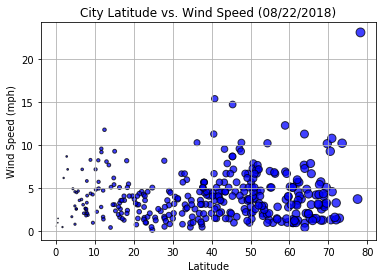

In [13]:
x_axis = weather_by_city["Lat"]
Wind_Speed = weather_by_city["Wind Speed"]

plt.scatter(x_axis, Wind_Speed, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title('City Latitude vs. Wind Speed (08/22/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

#Save the Figure
plt.savefig("../Images/Lat vs. WindSpeed.png")